In [1]:
# Don't mind me !
# Hidden cell to setup imports and rendering
%matplotlib inline
import sys
sys.path.insert(0, '../../../moclo')
import moclo.kits
moclo.kits.__path__.append('../../../moclo-ytk/moclo/kits')
import moclo.kits.ytk

In [2]:
# Don't mind me !
# Hidden cell to download YTK GenBank sequences from AddGene
import io
import zipfile
import requests
URL = 'https://media.addgene.org/cms/filer_public/4d/26/4d26f69c-1b8e-4473-8494-a7e993618112/ytk_genbank_files.zip'
if not os.path.exists('plasmids'):
    with requests.get(URL) as r:
        content = io.BytesIO(r.content)
        with zipfile.ZipFile(content, 'r') as zf:
            zf.extractall()

# YTK integration vector

In this example, we will be using the `moclo` library as well as the `moclo-ytk` extension kit to generate the pre-assembled YTK integration vector (**pYTK096**) from the available YTK parts, as described in the [*Lee et al.* paper](https://doi.org/10.1021/sb500366v)

## Structure

The list of parts, as well as the vector structure, can be found in the **Supporting Table S1** from the *Lee et al.* supplementary materials:

![Supporting Table S1](https://pubs.acs.org/appl/literatum/publisher/achs/journals/content/asbcd6/2015/asbcd6.2015.4.issue-9/sb500366v/20150914/images/large/sb-2014-00366v_0007.jpeg)

## Loading parts

First of all, we'll be loading each of the desired parts from the GenBank files
distributed with the YTK kits. They can be found on the
[AddGene YTK page](https://www.addgene.org/kits/moclo-ytk/#protocols-and-resources).

In [3]:
import os
import gzip

from Bio.SeqIO import read
from moclo.kits import ytk
from moclo.record import CircularRecord

def load_plasmid(name):
    with open(os.path.join('plasmids', name), 'r') as handle:
        return CircularRecord(read(handle, 'gb'))

parts = {
  'Part 1':    ytk.YTKPart1(load_plasmid("pYTK008.gb")),
  'Part 234r': ytk.YTKPart234r(load_plasmid("pYTK047.gb")),
  'Part 5':    ytk.YTKPart5(load_plasmid("pYTK073.gb")),
  'Part 6':    ytk.YTKPart6(load_plasmid("pYTK074.gb")),
  'Part 7':    ytk.YTKPart7(load_plasmid("pYTK086.gb")),
  'Part 8a':   ytk.YTKPart8a(load_plasmid("pYTK090.gb")),
  'Part 8b':   ytk.YTKPart8b(load_plasmid("pYTK092.gb")),
}

## Checking parts

We can use `dna_features_viewer` to visualize your records before proceeding (for readability purposes, we'll show the records as linear although they are plasmids):

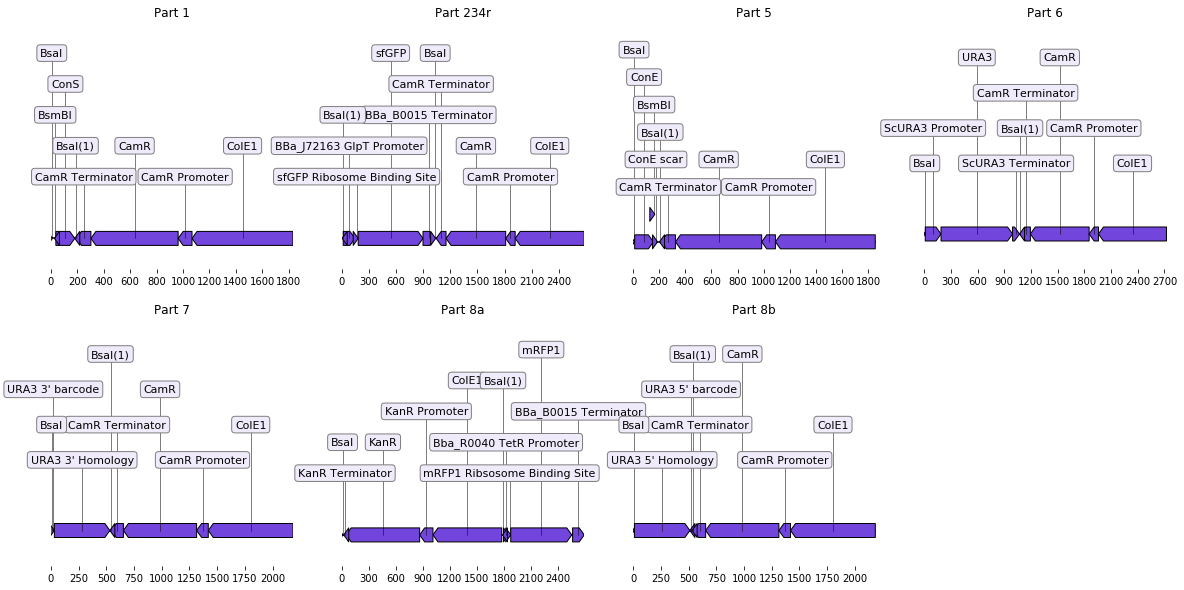

In [4]:
import dna_features_viewer as dfv
import matplotlib.pyplot as plt

translator = dfv.BiopythonTranslator()
plt.figure(1, figsize=(20, 10))
for index, (name, part) in enumerate(parts.items()):
    ax = plt.subplot(2, 4, index + 1)
    translator.translate_record(part.record).plot(ax)
    plt.title(name)
plt.show()

## Creating the assembly

We use the `Part 8a` as our base assembly vector, and then assemble all the other parts into that vector:

In [5]:
vector = parts.pop('Part 8a')
assembly = vector.assemble(*parts.values())

## Comparing the assembly to the expected vector

FileNotFoundError: [Errno 2] No such file or directory: 'plasmids/pYTK096.gb.gz'

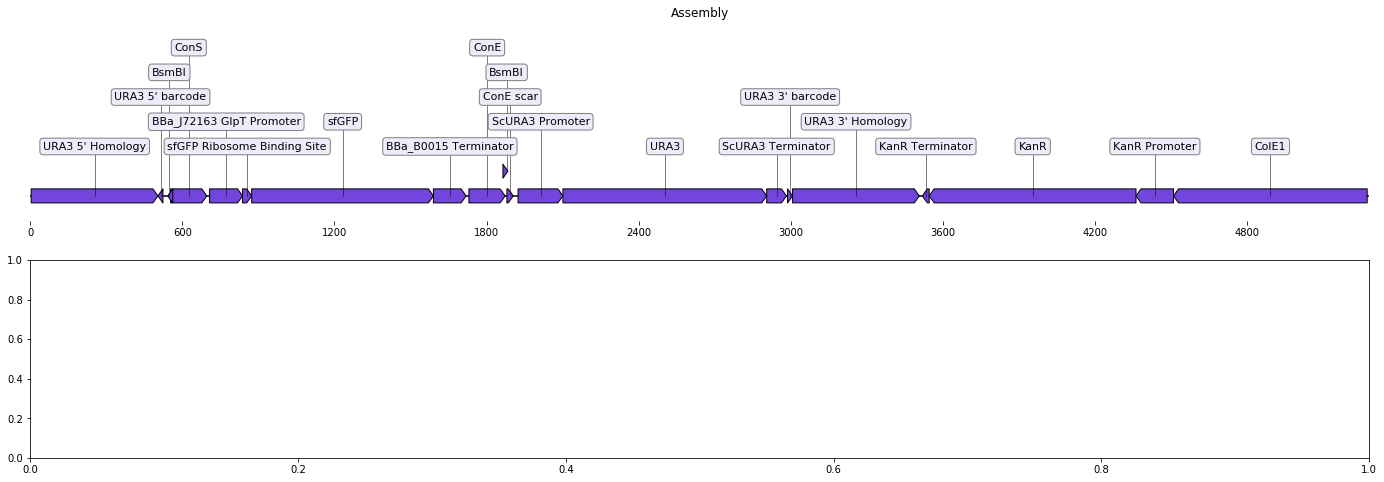

In [6]:
plt.figure(2, figsize=(24, 8))

ax = plt.subplot(2, 1, 1)
translator.translate_record(assembly).plot(ax)
plt.title('Assembly')

ax = plt.subplot(2, 1, 2)
translator.translate_record(load_plasmid('pYTK096.gb')).plot(ax)
plt.title('Expected')

plt.show()
